<h1 style="text-align: center;">Data Scientist Technical Assessment</h1>
<h1 style="text-align: center;">Ace Hardware Corporation</h1>

<div style="text-align: center"> By Qichao Sun </div>

# 1. Environment Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
print('The numpy version is {}.'.format(np.__version__))
print('The pandas version is {}.'.format(pd.__version__))
print('The matplotlib version is {}.'.format(matplotlib.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

The numpy version is 1.20.1.
The pandas version is 1.4.2.
The matplotlib version is 3.5.2.
The scikit-learn version is 1.2.2.
The seaborn version is 0.11.2.


In [3]:
!pipreqsnb . --force

pipreqs  --force .
INFO: Successfully saved requirements file in ./requirements.txt


In [4]:
!pwd

/Users/qsun/My Drive/Hunting/Records/ACE Hardware


# 2. Read in Data

In [5]:
!pwd
# Check the present working directory 

/Users/qsun/My Drive/Hunting/Records/ACE Hardware


In [6]:
df = pd.read_csv("./sales.csv")
# read in data from the pwd
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107,176,292,116,69,38,962,110,110,160,270,2,4/1/10 0:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75,135,225,90,60,29,1148,90,80,130,210,2,7/1/10 0:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122,195,325,130,73,42,1134,130,110,180,290,2,11/1/10 0:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105,174,289,115,69,37,1166,110,100,160,260,2,12/1/10 0:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104,135,223,90,56,29,1148,90,80,130,210,2,7/1/11 0:00,Coffee,Columbian,Regular


# 3. Data Clean

In [7]:
df.info()  
# check data type for each column
# check data null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Area Code       4248 non-null   int64 
 1   State           4248 non-null   object
 2   Market          4248 non-null   object
 3   Market Size     4248 non-null   object
 4   Profit          4248 non-null   int64 
 5   Margin          4248 non-null   int64 
 6   Sales           4248 non-null   int64 
 7   COGS            4248 non-null   int64 
 8   Total Expenses  4248 non-null   int64 
 9   Marketing       4248 non-null   int64 
 10  Inventory       4248 non-null   int64 
 11  Budget Profit   4248 non-null   int64 
 12  Budget COGS     4248 non-null   int64 
 13  Budget Margin   4248 non-null   int64 
 14  Budget Sales    4248 non-null   int64 
 15  ProductId       4248 non-null   int64 
 16  Date            4248 non-null   object
 17  Product Type    4248 non-null   object
 18  Product 

In [8]:
df.isnull().sum()
# check if data have null values; if so, we need to do imputation.

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Date              0
Product Type      0
Product           0
Type              0
dtype: int64

In [9]:
df.duplicated().sum()
# check if there's any duplicate rows; if so, we need to dedup.

0

### Correct calculation error

In [10]:
# According to the document, Margin = Profit + Total Expenses OR Margin = Sales - COGS ($)
# We need to make sure the data in the table aligned with the documents

print(df[df['Profit'] + df['Total Expenses'] != df['Margin']].shape[0])
print(df[df['Sales'] - df['COGS'] != df['Margin']].shape[0])

2105
2088


Since the number in the table doesn't match the dictionary, we need to recalculate the number.  Here we assume variables Sales, COGS, Total Expenses are correct, because they are actual numbers collected directly and less likely to make mistakes compared to calculated profit and margin.

In [11]:
# Obviously, the profit and margin number for some records do not match with the document.
# There are 2105 records that don't fit Margin = Profit + Total Expenses and 2088 records that don't fit Margin = Sales - COGS ($).
# So we have to rely on some features and correct others.
# In this situation, since numbers in profit and margin are calculated, they are more likely to get wrong.  
# So here I assume features Sales, COGS, Total Expenses are correct and then re-calculate profit and margin.
# The corrected features are profit_new and margin_new.

In [12]:
df0 = df.copy()

df0['Margin_new'] = df0['Sales'] - df0['COGS']
# Re-calculate Margin, named Margin_new
df0['Profit_new'] = df0['Margin_new'] - df0['Total Expenses']
# Re-calculate Profit, named Profit_new

df0.drop(['Margin','Profit'], axis =1, inplace = True )
# Drop the original columns
df0.head()


,Area Code,State,Market,Market Size,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type,Margin_new,Profit_new
0,203,Connecticut,East,Small Market,292,116,69,38,962,110,110,160,270,2,4/1/10 0:00,Coffee,Columbian,Regular,176,107
1,203,Connecticut,East,Small Market,225,90,60,29,1148,90,80,130,210,2,7/1/10 0:00,Coffee,Columbian,Regular,135,75
2,203,Connecticut,East,Small Market,325,130,73,42,1134,130,110,180,290,2,11/1/10 0:00,Coffee,Columbian,Regular,195,122
3,203,Connecticut,East,Small Market,289,115,69,37,1166,110,100,160,260,2,12/1/10 0:00,Coffee,Columbian,Regular,174,105
4,203,Connecticut,East,Small Market,223,90,56,29,1148,90,80,130,210,2,7/1/11 0:00,Coffee,Columbian,Regular,133,77


# 4. Information Extraction

## 4.1 Product Information

In [13]:
product = df0[['ProductId','Product Type','Product','Type']].drop_duplicates().sort_values(by=['ProductId']).set_index('ProductId')
product
# product table shows each product's detail and serves as a SKU table

,Product Type,Product,Type
ProductId,,,
1,Coffee,Amaretto,Regular
2,Coffee,Columbian,Regular
3,Coffee,Decaf Irish Cream,Decaf
4,Espresso,Caffe Latte,Regular
5,Espresso,Caffe Mocha,Regular
6,Espresso,Decaf Espresso,Decaf
7,Espresso,Regular Espresso,Regular
8,Herbal Tea,Chamomile,Decaf
9,Herbal Tea,Lemon,Decaf


## 4.2 Area Information

In [14]:
area_code = df0[['Area Code','State','Market','Market Size']].drop_duplicates().sort_values(by=['Area Code']).reset_index(drop=True)
area_code.head()
# area_code table is an area dictionary for Area Code, State, Market and its Market Size

,Area Code,State,Market,Market Size
0,203,Connecticut,East,Small Market
1,206,Washington,West,Small Market
2,209,California,West,Major Market
3,210,Texas,South,Major Market
4,212,New York,East,Major Market


In [15]:
area_code.groupby('State')[['Market','Market Size']].nunique()
# Make sure each state can only belong to one Market and one Market Size

,Market,Market Size
State,,
California,1,1
Colorado,1,1
Connecticut,1,1
Florida,1,1
Illinois,1,1
Iowa,1,1
Louisiana,1,1
Massachusetts,1,1
Missouri,1,1


In [16]:
state = area_code.groupby('State')[['Market','Market Size']].max()
state.head()
#state table is a state dictionary for its Market and Market Size

,Market,Market Size
State,,
California,West,Major Market
Colorado,Central,Major Market
Connecticut,East,Small Market
Florida,East,Major Market
Illinois,Central,Major Market


# 5. First Impression on Data

## 5.1 Corralation Exploration 

In [17]:
df0.columns

Index(['Area Code', 'State', 'Market', 'Market Size', 'Sales', 'COGS',
       'Total Expenses', 'Marketing', 'Inventory', 'Budget Profit',
       'Budget COGS', 'Budget Margin', 'Budget Sales', 'ProductId', 'Date',
       'Product Type', 'Product', 'Type', 'Margin_new', 'Profit_new'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Sales'),
  Text(1.5, 0, 'COGS'),
  Text(2.5, 0, 'Total Expenses'),
  Text(3.5, 0, 'Marketing'),
  Text(4.5, 0, 'Inventory'),
  Text(5.5, 0, 'Margin_new'),
  Text(6.5, 0, 'Profit_new'),
  Text(7.5, 0, 'Budget Sales'),
  Text(8.5, 0, 'Budget COGS'),
  Text(9.5, 0, 'Budget Profit'),
  Text(10.5, 0, 'Budget Margin')])

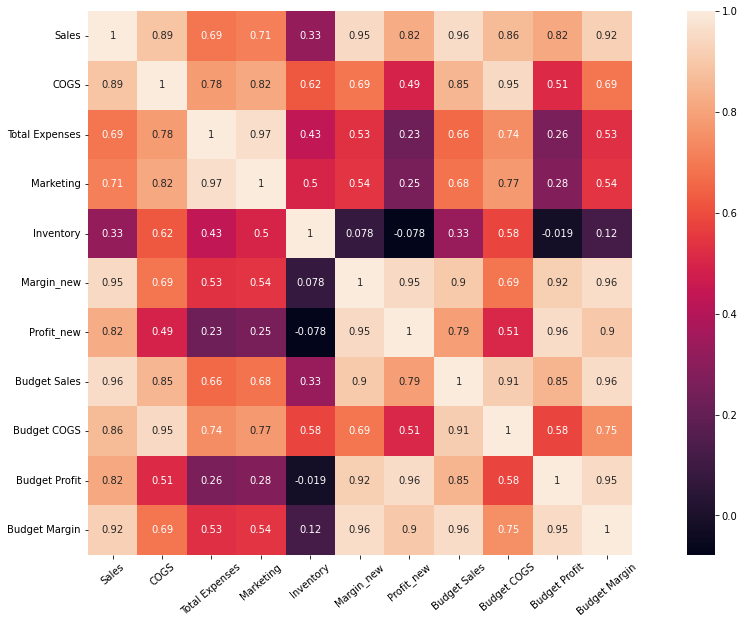

In [18]:
df0_corr_1 = df0[['Sales','COGS','Total Expenses', 'Marketing', 'Inventory','Margin_new', 'Profit_new',
                   'Budget Sales','Budget COGS','Budget Profit', 'Budget Margin', ]].corr()
# Calculate the features' correlation matrix

plt.figure(figsize=(20,10))
sns.heatmap(df0_corr_1, square=True, annot = True)
plt.xticks(rotation=40)
# Plot heatmap for correlation matrix

In [19]:
# From the heatmap, we can see the hint of the following things.
# Weak relationship between Profit and Marketing, indicating the business is not marketing driven

## 5.2 Exploration of Sales Breakdown for Each Product

In [20]:
# To better understand the sales composition, I split the total expenses into Marketing and Non_Marketing_expense
df0['Non_Marketing_expense'] = df0['Total Expenses'] - df0['Marketing']

In [21]:
# Now sales = COGS (Cost of Goods Sold) + Non_Marketing_expense + Marketing + Profit_new

df1_1 = df0.groupby('ProductId')[['COGS','Non_Marketing_expense','Marketing','Profit_new']].sum()
# Aggregate whole table to summarize the total amount for each part between 2010 and 2011

df1_1

,COGS,Non_Marketing_expense,Marketing,Profit_new
ProductId,,,,
1,12732,4239,4658,4640
2,48396,14027,17346,48542
3,29568,8393,11362,12925
4,15294,4977,5472,10156
5,37990,10681,19686,16547
6,33318,8806,10112,25926
7,10398,1923,2946,8764
8,31386,7998,12166,24028
9,41494,11866,15880,26686


Text(0, 0.5, 'Percentage (%)')

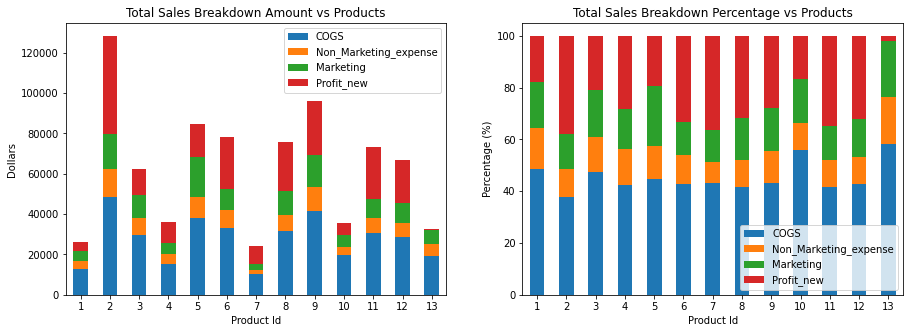

In [22]:
# Let's see how these pieces distributes within Sales of each product between 2010 and 2011

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

plt.subplot(1, 2, 1)
df1_1.plot(kind='bar',stacked=True,ax=ax1)
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Total Sales Breakdown Amount vs Products")
plt.xlabel("Product Id")
plt.ylabel("Dollars")

plt.subplot(1, 2, 2)
df1_2 = df1_1.apply(lambda x: x*100/sum(x), axis=1)
df1_2.plot(kind="bar", stacked=True,ax=ax2).legend(loc='lower right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Total Sales Breakdown Percentage vs Products")
plt.xlabel("Product Id")
plt.ylabel("Percentage (%)")

In [23]:
# The first Bar charts shows the sales amount for each product, and how much of sales were on COGS, Non_Markting_expense, Marketing and Profit.
# The second Bar charts shows the percentage of each piece for each product.

# Finding:
# 1. Product 2 has the largest sales amount; whereas, product 1,4,7 and 13 have small sales.
# 2. From the percentage bar chart, it's obvious that product 2 has the best profit rate and product 13 has the worst profit rate and highest expense percentage.

In [24]:
# For the convenience, here is the product table for look up.
product

,Product Type,Product,Type
ProductId,,,
1,Coffee,Amaretto,Regular
2,Coffee,Columbian,Regular
3,Coffee,Decaf Irish Cream,Decaf
4,Espresso,Caffe Latte,Regular
5,Espresso,Caffe Mocha,Regular
6,Espresso,Decaf Espresso,Decaf
7,Espresso,Regular Espresso,Regular
8,Herbal Tea,Chamomile,Decaf
9,Herbal Tea,Lemon,Decaf


## 5.3 Exploration of Market Sales Breakdown for Each Product

In [25]:
# Now Let's see how each market contributes sales to products

df2_1 = df0.groupby(['ProductId','Market'])['Sales'].sum().to_frame()

# Pivot the table to get Sales for each market.
df2_2 = df2_1['Sales'].unstack().add_prefix('Market_').rename_axis([None], axis=1).fillna(0)
df2_2

,Market_Central,Market_East,Market_South,Market_West
ProductId,,,,
1,14012.0,2994.0,0.0,9263.0
2,28911.0,47385.0,21663.0,30352.0
3,26157.0,6262.0,11596.0,18233.0
4,0.0,0.0,15443.0,20456.0
5,35218.0,16646.0,14166.0,18874.0
6,24483.0,7720.0,15381.0,30578.0
7,0.0,24031.0,0.0,0.0
8,36571.0,2193.0,11183.0,25631.0
9,21982.0,27177.0,14494.0,32273.0


Text(0, 0.5, 'Percentage (%)')

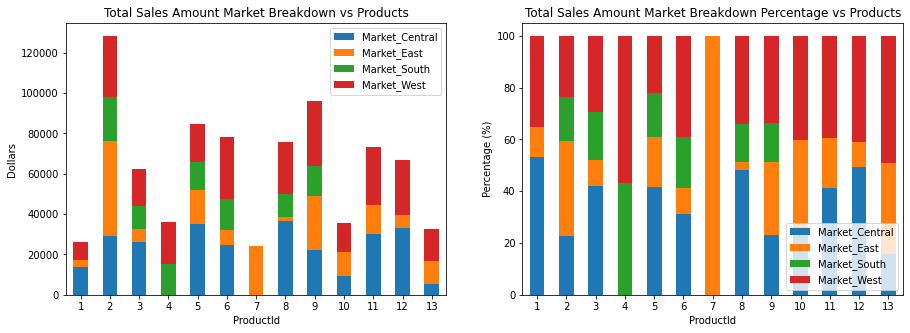

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

plt.subplot(1, 2, 1)
df2_2.plot(kind='bar',stacked=True,ax=ax1)
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Total Sales Amount Market Breakdown vs Products")
plt.xlabel("ProductId")
plt.ylabel("Dollars")

plt.subplot(1, 2, 2)
df2_3 = df2_2.apply(lambda x: x*100/sum(x), axis=1)
df2_3.plot(kind="bar", stacked=True,ax=ax2).legend(loc='lower right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Total Sales Amount Market Breakdown Percentage vs Products")
plt.xlabel("ProductId")
plt.ylabel("Percentage (%)")

In [27]:
# 1. Products were sold in a very different regions.
# 2. For most of products, Central Market takes a large portion.
# 3. Product 7 is sold in a signle region, East Market.

In [28]:
# For the convenience, here is the product table for look up.
product

,Product Type,Product,Type
ProductId,,,
1,Coffee,Amaretto,Regular
2,Coffee,Columbian,Regular
3,Coffee,Decaf Irish Cream,Decaf
4,Espresso,Caffe Latte,Regular
5,Espresso,Caffe Mocha,Regular
6,Espresso,Decaf Espresso,Decaf
7,Espresso,Regular Espresso,Regular
8,Herbal Tea,Chamomile,Decaf
9,Herbal Tea,Lemon,Decaf


# 6. Feature Engineering: Reduction & Addition & Manipulation

## 6.1 Create dummy variables for Market and Market Size (One-Hot-Encoding)

In [29]:
df0.groupby('Market')['Market Size'].nunique()
# Check if all markets have both Major Market and Small Market

Market
Central    2
East       2
South      2
West       2
Name: Market Size, dtype: int64

In [30]:
print(df0['Market'].unique())
print(df0['Market Size'].unique())

['East' 'West' 'South' 'Central']
['Small Market' 'Major Market']


In [31]:
# Create dummy variables for both Market and Market Size
# The dummy variables (1/0) are indicator of sales that happens in corresponding market/market_size.

df_one_hot = pd.get_dummies(df0, columns = ['Market', 'Market Size'])
df_one_hot.columns

Index(['Area Code', 'State', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Margin',
       'Budget Sales', 'ProductId', 'Date', 'Product Type', 'Product', 'Type',
       'Margin_new', 'Profit_new', 'Non_Marketing_expense', 'Market_Central',
       'Market_East', 'Market_South', 'Market_West',
       'Market Size_Major Market', 'Market Size_Small Market'],
      dtype='object')

## 6.2 Create New Features

### 6.2.1 Sales Forcasting Accuracy

In [32]:
# Sales Forcasting Accuracy means how accurate your sales forecast is. 
# It tells us how close we come to actually hit our projections.
# The closer it is to 0, the more accurate our projection is.

df_one_hot['sales_forcast_accuracy'] = (df_one_hot['Sales'] - df_one_hot['Budget Sales'])*100/df_one_hot['Sales']


### 6.2.2 Stock to Sales Ratio

In [33]:
# Stock to sales ratio, also known as inventory to sales ratio, 
# measures the value of your inventory against the value of sales for a certain period of time.

df_one_hot['stock_to_sales'] = df_one_hot['Inventory']/df_one_hot['Sales']

# this calculated ratio here is for a certain month of a product at one area; to be specific, it's for one sale in the sales.csv
# it shows how well the products sell.

### 6.2.3 Total Sales, COGS, Marketing, Non_Marketing_expense, Profit, Inventory, Budget Sales for each product

In [34]:
# Aggregate Sales, COGS, Marketing, Non_Marketing_expense, Profit, Inventory, Budget Sales to product level
# .sum() gives us total sales/COGS/Marketing/Non_Marketing_expense/Profit/Inventory/Budget Sales over 2010 and 2011

df3 = df_one_hot[['ProductId', 'Sales', 'COGS', 'Marketing', 'Non_Marketing_expense', 'Profit_new', 'Inventory', 'Budget Sales']]\
        .groupby('ProductId').sum()

# Now we finally have a dataframe, df3, aggregated on product level!

### 6.2.4 Aggregate on Market Region/size

In [35]:
# Aggregate how many times a certain market region and size shows in the sales.csv for each product

df3[['Market_Central','Market_East', 'Market_South', 'Market_West','Market Size_Major Market', 'Market Size_Small Market']] \
        = df_one_hot[['ProductId', \
        'Market_Central','Market_East', 'Market_South', 'Market_West', \
        'Market Size_Major Market', 'Market Size_Small Market']].groupby('ProductId').sum()

In [36]:
# PLEASE NOTE: The above aggregated frequencies shows how active the sales of a product is in 2010 and 2011; 
              # it does not necessarily indicate the sales amount or sales value;
              # without the units sold in each sale record in sales.csv, this is probably the only thing we can do to reflect market activity.

### 6.2.5 Market Size Ratio

In [37]:
# Having Market Size for both major and small market is redundant.
# Here we can use the ratio of major market showup frequency and small market showup frequency to replace them.

df3['Market_size_ratio'] = round(df3['Market Size_Major Market']/df3['Market Size_Small Market'],2)
df3.drop(['Market Size_Major Market', 'Market Size_Small Market'],axis = 1,inplace = True)

### 6.2.6 Average Stock_to_Sales_Ratio and Sales_Forcast_Accuracy

In [38]:
# Previously we calculated the sales_forcast_accuracy and stock_to_sales, which are calculated on per sale record.
# Here let's aggregate it to product level and get avg_stock_to_sales and avg_sales_forcast_accuracy.

df3['avg_stock_to_sales'] = df_one_hot[['ProductId','stock_to_sales']].groupby('ProductId').mean()
df3['avg_sales_forcast_accuracy'] = df_one_hot[['ProductId','sales_forcast_accuracy']].groupby('ProductId').mean()

In [39]:
# Let's see the dataset created ready for modeling.
df3

,Sales,COGS,Marketing,Non_Marketing_expense,Profit_new,Inventory,Budget Sales,Market_Central,Market_East,Market_South,Market_West,Market_size_ratio,avg_stock_to_sales,avg_sales_forcast_accuracy
ProductId,,,,,,,,,,,,,,
1,26269,12732,4658,4239,4640,142276,27200,96.0,24.0,0.0,72.0,0.60,6.881992,-3.288578
2,128311,48396,17346,14027,48542,339624,134380,144.0,120.0,96.0,120.0,0.67,3.673540,-5.400927
3,62248,29568,11362,8393,12925,322054,67040,144.0,24.0,96.0,120.0,0.60,6.836576,-8.711592
4,35899,15294,5472,4977,10156,55294,30540,0.0,0.0,96.0,120.0,0.29,2.689181,16.585659
5,84904,37990,19686,10681,16547,362996,84600,144.0,120.0,96.0,120.0,0.67,6.476660,5.394487
6,78162,33318,10112,8806,25926,308124,75720,144.0,48.0,96.0,120.0,0.55,5.437597,3.900909
7,24031,10398,2946,1923,8764,63334,22620,0.0,72.0,0.0,0.0,2.00,2.922810,7.658506
8,75578,31386,12166,7998,24028,273656,63840,144.0,24.0,96.0,120.0,0.60,5.040559,16.870029
9,95926,41494,15880,11866,26686,344898,78300,144.0,120.0,96.0,120.0,0.67,4.852317,18.791504


## 6.3 Principal Component Analysis

<!-- There are obvious relationship between COGS, Expenses and Sales.  So it's better to condoct a PCA to reduce the dimension before cluster analysis. -->

In [40]:
# It's essential to conduct PCA before cluster analysis.  
# Plus, considering only 13 products to continue, Feature reduction using PCA is necessary.

In [41]:
df3.columns
# Let's check what features we have

Index(['Sales', 'COGS', 'Marketing', 'Non_Marketing_expense', 'Profit_new',
       'Inventory', 'Budget Sales', 'Market_Central', 'Market_East',
       'Market_South', 'Market_West', 'Market_size_ratio',
       'avg_stock_to_sales', 'avg_sales_forcast_accuracy'],
      dtype='object')

In [42]:
# Since we want to analyze the common and difference among products,
# I pick the following 9 features into PCA and then Cluster to explain how much value products sold, made profit, inventory held and how market size affected.   

# 'Sales', 'COGS', 'Marketing', 'Non_Marketing_expense', 'Profit_new', 
# 'Inventory', 'avg_stock_to_sales', 'avg_sales_forcast_accuracy','Market_size_ratio'

### 6.3.1 Normalization

In [43]:
# Before we run PCA, the data needs to be scaled down to the same level.
# Here we use MinMaxScaler to do normalization to certain features.

# define min max scaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df3[['Sales', 'COGS', 'Marketing', 'Non_Marketing_expense', 'Profit_new', 'Inventory', \
                                      'avg_stock_to_sales',
                                      'avg_sales_forcast_accuracy','Market_size_ratio']].to_numpy())

print("Scaled Dataset Using MinMaxScaler")
df_scaled
# Here are the 9 features after normalization.  They are now all between 0 and 1.

Scaled Dataset Using MinMaxScaler


array([[0.02146145, 0.06142429, 0.10227001, 0.19134171, 0.08302525,
        0.2826826 , 0.22453049, 0.15849949, 0.18128655],
       [1.        , 1.        , 0.86021505, 1.        , 1.        ,
        0.92404339, 0.0527137 , 0.09676145, 0.22222222],
       [0.36648446, 0.50450024, 0.50274791, 0.53453404, 0.25607285,
        0.86694269, 0.22209841, 0.        , 0.18128655],
       [0.11380898, 0.12884889, 0.15089606, 0.25231328, 0.19823715,
        0.        , 0.        , 0.73936762, 0.        ],
       [0.58374568, 0.72614348, 1.        , 0.72356246, 0.33172505,
        1.        , 0.2028244 , 0.41228109, 0.22222222],
       [0.51909283, 0.60318964, 0.42807646, 0.56865499, 0.52762287,
        0.82167162, 0.14718122, 0.368628  , 0.15204678],
       [0.        , 0.        , 0.        , 0.        , 0.16916265,
        0.02612918, 0.01251113, 0.47845202, 1.        ],
       [0.49431339, 0.55234486, 0.55077658, 0.5019002 , 0.48797961,
        0.70965415, 0.12591937, 0.74767897, 0.18128655],


### 6.3.2 Feature Reduction using PCA

In [44]:
# Run PCA with min(sample size =13,n_features = 9) to see how increasing components explain variance.

pca = PCA(random_state = 35)
pca.fit(df_scaled)

PCA(random_state=35)

Text(0, 0.5, 'Cumulative Eplained Variance')

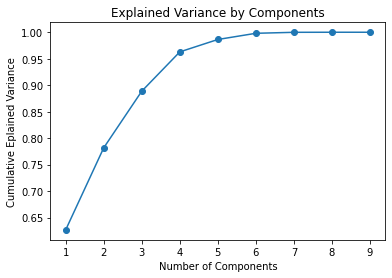

In [45]:
# The following plot shows how much variance can be explained along with the number of components increasing

plt.plot(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_.cumsum(),marker= 'o')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Eplained Variance')

In [46]:
# Here we can see 3 components can explain around 90% of variance, which is good enough.

In [47]:
# Let's run PCA wtih 3 components.

pca = PCA(3,random_state = 35)
df4 = pca.fit_transform(df_scaled)

In [48]:
# Here is the 3-component array to represent those 9 features and ready for cluster analysis.
df4

array([[-0.69050136, -0.43534136,  0.37917545],
       [ 1.30299943, -0.37531767, -0.11791228],
       [ 0.25577965, -0.36777758,  0.45540523],
       [-0.69882017, -0.111572  , -0.11080571],
       [ 0.72519044,  0.05140569,  0.18334722],
       [ 0.36626469, -0.13929301,  0.08769494],
       [-1.10820739, -0.43422744, -0.3207132 ],
       [ 0.23822344,  0.14643753, -0.1286963 ],
       [ 0.74388954,  0.28498253, -0.18716297],
       [-0.67920692,  0.18186286, -0.22020867],
       [ 0.13246394,  0.19746902, -0.19136322],
       [-0.05161275,  0.25728415, -0.33293138],
       [-0.53646253,  0.74408728,  0.50417088]])

# 7. Cluster Analysis

Here we use one of the most popular Cluster method, K-means Cluster.

I did consider and try other cluster methods capable of taking categorical variables, such as K-Modes and K-Prototype.  However, there are only 13 datapoints and our general goal is to focus on sales situation.  Categorical variables like 'Product','Type','State','Market' have affects so strong that can jam sales/profit/inventory/etc. variables' influence.

If there are more product to deal with, then K-Prototype may work.

## 7.1 Choosing the Number of Clusters

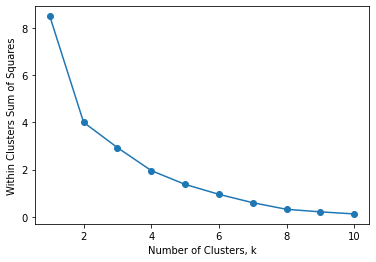

In [49]:
# Test how Within Clusters Sum of Squares changes with increasing the number of clusters  

wcss = [] # Within Clusters Sum of Squares
for k in range(1,11): # try cluster number from 1 to 10
    
    #  a K-Means instance with k clusters
    kcluster = KMeans(n_clusters=k, n_init=10, random_state=35 )
    kcluster.fit(df4)
    wcss.append(kcluster.inertia_)
    
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Within Clusters Sum of Squares')
plt.show()

In [50]:
# Based on the chart, let's choose 4 clusters according to elbow method.

## 7.2 Impletement Cluster

In [51]:
# Construct K-means method with 4 cluster
kmean_pca = KMeans(n_clusters= 4, n_init=10, random_state=35 )

# Fit model to samples
kmean_pca.fit(df4)

KMeans(n_clusters=4, n_init=10, random_state=35)

In [52]:
# Check generated cluster number/label
kmean_pca.labels_

array([1, 0, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 3], dtype=int32)

In [53]:
# Now let's go back to df3, the table before we jumped into PCA.
# Attach all 3 components and cluster_number to the df3 and get a new dataset, df5

df5 = pd.concat([df3.reset_index(),pd.DataFrame(df4)], axis = 1).copy()
df5.columns.values[-3:] = ['comp_1','comp_2','comp_3']
df5['Cluster_number'] = kmean_pca.labels_
df5.set_index('ProductId', inplace=True)

In [54]:
df5
# Sales information on product level with cluster number assigned

,Sales,COGS,Marketing,Non_Marketing_expense,Profit_new,Inventory,Budget Sales,Market_Central,Market_East,Market_South,Market_West,Market_size_ratio,avg_stock_to_sales,avg_sales_forcast_accuracy,comp_1,comp_2,comp_3,Cluster_number
ProductId,,,,,,,,,,,,,,,,,,
1,26269,12732,4658,4239,4640,142276,27200,96.0,24.0,0.0,72.0,0.60,6.881992,-3.288578,-0.690501,-0.435341,0.379175,1
2,128311,48396,17346,14027,48542,339624,134380,144.0,120.0,96.0,120.0,0.67,3.673540,-5.400927,1.302999,-0.375318,-0.117912,0
3,62248,29568,11362,8393,12925,322054,67040,144.0,24.0,96.0,120.0,0.60,6.836576,-8.711592,0.255780,-0.367778,0.455405,2
4,35899,15294,5472,4977,10156,55294,30540,0.0,0.0,96.0,120.0,0.29,2.689181,16.585659,-0.698820,-0.111572,-0.110806,1
5,84904,37990,19686,10681,16547,362996,84600,144.0,120.0,96.0,120.0,0.67,6.476660,5.394487,0.725190,0.051406,0.183347,0
6,78162,33318,10112,8806,25926,308124,75720,144.0,48.0,96.0,120.0,0.55,5.437597,3.900909,0.366265,-0.139293,0.087695,2
7,24031,10398,2946,1923,8764,63334,22620,0.0,72.0,0.0,0.0,2.00,2.922810,7.658506,-1.108207,-0.434227,-0.320713,1
8,75578,31386,12166,7998,24028,273656,63840,144.0,24.0,96.0,120.0,0.60,5.040559,16.870029,0.238223,0.146438,-0.128696,2
9,95926,41494,15880,11866,26686,344898,78300,144.0,120.0,96.0,120.0,0.67,4.852317,18.791504,0.743890,0.284983,-0.187163,0


In [55]:
# The distribution of products
df5.reset_index().groupby('Cluster_number').apply(lambda x: list(x.ProductId))

Cluster_number
0            [2, 5, 9]
1        [1, 4, 7, 10]
2    [3, 6, 8, 11, 12]
3                 [13]
dtype: object

## 7.3 Cluster visualizations

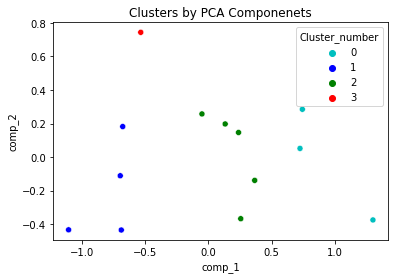

In [56]:
# We use 3 components to cluster 13 products.
# Here we plot how 13 products are distributed and assigned to 4 cluster in the view of component 1 and component 2.

sns.scatterplot(data=df5, x='comp_1', y='comp_2', hue = 'Cluster_number',palette=['c','b','g','r'])
plt.title('Clusters by PCA Componenets')
plt.show()

In [57]:
# From the above scatter plot, product 3, which we see poor sales in the session 5.2, is now assigned to cluster 3 alone.

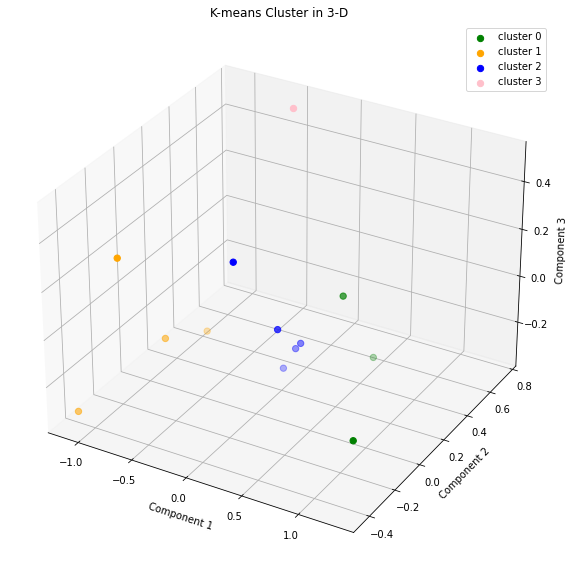

In [58]:
# Since we have 3 conponents, a 3-D plot is more straight forward.

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

clust_0 = df5[df5['Cluster_number'] == 0]
clust_1 = df5[df5['Cluster_number'] == 1]
clust_2 = df5[df5['Cluster_number'] == 2]
clust_3 = df5[df5['Cluster_number'] == 3]

ax.scatter(clust_0['comp_1'],clust_0['comp_2'],clust_0['comp_3'], s = 40 , color = 'green', label = "cluster 0")
ax.scatter(clust_1['comp_1'],clust_1['comp_2'],clust_1['comp_3'], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(clust_2['comp_1'],clust_2['comp_2'],clust_2['comp_3'], s = 40 , color = 'blue', label = "cluster 2")
ax.scatter(clust_3['comp_1'],clust_3['comp_2'],clust_3['comp_3'], s = 40 , color = 'pink', label = "cluster 3")

ax.set_title("K-means Cluster in 3-D")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.legend()

plt.show()

In [59]:
# The 3-D scatter plot shows all 13 products are well assigned to 4 clusters.  And all clusters have significant distance between each other.

In [60]:
df5.columns

Index(['Sales', 'COGS', 'Marketing', 'Non_Marketing_expense', 'Profit_new',
       'Inventory', 'Budget Sales', 'Market_Central', 'Market_East',
       'Market_South', 'Market_West', 'Market_size_ratio',
       'avg_stock_to_sales', 'avg_sales_forcast_accuracy', 'comp_1', 'comp_2',
       'comp_3', 'Cluster_number'],
      dtype='object')

# 8. Product profiling

In [61]:
# After clustering 13 products into 4 groups, it's time to profile each cluster.

In [62]:
# First, let's attach cluster number column to each sale records in df_one_hot.

df_cluster = pd.merge(df_one_hot,df5['Cluster_number'], on='ProductId', how='inner')
df_cluster.head()

,Area Code,State,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,...,Non_Marketing_expense,Market_Central,Market_East,Market_South,Market_West,Market Size_Major Market,Market Size_Small Market,sales_forcast_accuracy,stock_to_sales,Cluster_number
0,203,Connecticut,292,116,69,38,962,110,110,160,...,31,0,1,0,0,0,1,7.534247,3.294521,0
1,203,Connecticut,225,90,60,29,1148,90,80,130,...,31,0,1,0,0,0,1,6.666667,5.102222,0
2,203,Connecticut,325,130,73,42,1134,130,110,180,...,31,0,1,0,0,0,1,10.769231,3.489231,0
3,203,Connecticut,289,115,69,37,1166,110,100,160,...,32,0,1,0,0,0,1,10.034602,4.034602,0
4,203,Connecticut,223,90,56,29,1148,90,80,130,...,27,0,1,0,0,0,1,5.829596,5.147982,0


In [63]:
# Let's see what features are avaiable for us to work with
df_cluster.columns

Index(['Area Code', 'State', 'Sales', 'COGS', 'Total Expenses', 'Marketing',
       'Inventory', 'Budget Profit', 'Budget COGS', 'Budget Margin',
       'Budget Sales', 'ProductId', 'Date', 'Product Type', 'Product', 'Type',
       'Margin_new', 'Profit_new', 'Non_Marketing_expense', 'Market_Central',
       'Market_East', 'Market_South', 'Market_West',
       'Market Size_Major Market', 'Market Size_Small Market',
       'sales_forcast_accuracy', 'stock_to_sales', 'Cluster_number'],
      dtype='object')

## 8.1 Business Metrics

The general goal is to find the difference between clusters.  Here I'd like to calculate a few metrics for each clusters, and then compare them to the corresponding overall metric.

### 8.1.1 Aggregate Sales Data to Cluster Level

In [64]:
df6 = df_cluster.groupby('Cluster_number')\
        [['Sales', 'COGS', 'Marketing', 'Non_Marketing_expense', 'Profit_new', 'Inventory', 'Budget Sales']].sum()
df6

,Sales,COGS,Marketing,Non_Marketing_expense,Profit_new,Inventory,Budget Sales
Cluster_number,,,,,,,
0,309141,127880,52912,36574,91775,1047518,297280
1,121909,58354,19184,14935,29436,471318,108680
2,355911,153360,53252,39698,109601,1405228,314860
3,32850,19078,7126,5981,665,259308,25340


### 8.1.2 Average Sales

In [65]:
df6['avg_sales'] = df_cluster[['Cluster_number','Sales']].groupby('Cluster_number').mean()
df6['avg_sales'] 
# The average sales shows how much average value of sales was made per sale record in sales.csv
# the larger, the better

Cluster_number
0    214.681250
1    181.412202
2    192.592532
3    114.062500
Name: avg_sales, dtype: float64

### 8.1.3 Index of Cluster Profit Rate

In [66]:
# Calculate profit_rate = Profit / (Sales - Profit) for both cluster and overall
# Then divide cluster's profit_rate by overall profit_rate, multiplied by 100

df6['index_profit_rate'] = (df6['Profit_new']/(df6['Sales']-df6['Profit_new']))*100/ \
                            (df6['Profit_new'].sum()/(df6['Sales'].sum()-df6['Profit_new'].sum()))
df6['index_profit_rate']

# The index shows how well a cluster can make profit compared to overall profit rate.
# 100 means the overall average; higher than 100 means better than average and lower than 100 means worse than average.

Cluster_number
0    107.312146
1     80.905854
2    113.096346
3      5.251510
Name: index_profit_rate, dtype: float64

### 8.1.4 Index of Cluster Marketing Expense Rate

In [67]:
# Calculate Marketing Expense Rate = Marketing expense / Sales for both cluster and overall
# Then divide cluster's Marketing Expense Rate by overall Marketing Expense Rate, multiplied by 100

df6['index_marketing_rate'] = (df6['Marketing']/df6['Sales'])*100/(df6['Marketing'].sum()/df6['Sales'].sum())
df6['index_marketing_rate']

# The index shows how well a cluster's marketing expense perform compared to the overall marketing expense rate.
# 100 means the overall average; higher than 100 means more than average and lower than 100 means less than average.
# A lower index means the cluster is able to spend less and perform same.  In other words, spend same, and perform better.

Cluster_number
0    105.920656
1     97.383749
2     92.592882
3    134.243583
Name: index_marketing_rate, dtype: float64

### 8.1.5 Cluster Average Stock_to_Sales Ratio

In [68]:
# For each sale record, we have a stock_to_sales ratio;
# Here we calcuated the average ratio on cluster level

df6['cluster_avg_stock_to_sales'] = df_cluster[['Cluster_number','stock_to_sales']].groupby('Cluster_number').mean()
df6['cluster_avg_stock_to_sales'] 

# The cluster ratio shows how well a cluster's products can sell.
# Higher number means stores may have too many goods in stock.

Cluster_number
0     5.000839
1     5.041557
2     5.369154
3    21.362865
Name: cluster_avg_stock_to_sales, dtype: float64

### 8.1.6 Cluster Average Sales Forcasting Accuracy

In [69]:
# For each sale record, we have a sales_forcast_accuracy describing how close the budget sales number is to acual sales number.
# Here we calculated the average accuracy on cluster level

df6['cluster_avg_sales_forcast_accuracy'] = df_cluster[['Cluster_number','sales_forcast_accuracy']].groupby('Cluster_number').mean()
df6['cluster_avg_sales_forcast_accuracy'] 

# The cluster accuracy shows if the sales prediction is aligned with actual sales.
# The closer it's to 0, the better and more accurate the budget sales is.

Cluster_number
0     6.261688
1    11.398370
2    10.549091
3    25.503121
Name: cluster_avg_sales_forcast_accuracy, dtype: float64

## 8.2 Product Profiling Details

### 8.2.1 Product Significant Features Identify

In [70]:
df6.columns

Index(['Sales', 'COGS', 'Marketing', 'Non_Marketing_expense', 'Profit_new',
       'Inventory', 'Budget Sales', 'avg_sales', 'index_profit_rate',
       'index_marketing_rate', 'cluster_avg_stock_to_sales',
       'cluster_avg_sales_forcast_accuracy'],
      dtype='object')

In [71]:
df7 = df6.drop(['COGS', 'Marketing', 'Non_Marketing_expense', 'Profit_new','Inventory', 'Budget Sales'], axis = 1)
df7

,Sales,avg_sales,index_profit_rate,index_marketing_rate,cluster_avg_stock_to_sales,cluster_avg_sales_forcast_accuracy
Cluster_number,,,,,,
0,309141,214.681250,107.312146,105.920656,5.000839,6.261688
1,121909,181.412202,80.905854,97.383749,5.041557,11.398370
2,355911,192.592532,113.096346,92.592882,5.369154,10.549091
3,32850,114.062500,5.251510,134.243583,21.362865,25.503121


Still too many numbers, let's try something more intuitive.
Here we use heatmap to highlight the difference between clsuters.

In [72]:
# Since columns have difference scale, we need to scale to the same level first.

# define min max scaler
scaler2 = MinMaxScaler()
df7_scaled = pd.DataFrame(scaler2.fit_transform(df7), index = df7.index, columns=df7.columns)

print("Scaled Dataset Using MinMaxScaler")
df7_scaled

Scaled Dataset Using MinMaxScaler


,Sales,avg_sales,index_profit_rate,index_marketing_rate,cluster_avg_stock_to_sales,cluster_avg_sales_forcast_accuracy
Cluster_number,,,,,,
0,0.855229,1.000000,0.946366,0.319989,0.000000,0.000000
1,0.275672,0.669355,0.701511,0.115025,0.002489,0.266959
2,1.000000,0.780471,1.000000,0.000000,0.022510,0.222821
3,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, '0'), Text(0, 1.5, '1'), Text(0, 2.5, '2'), Text(0, 3.5, '3')])

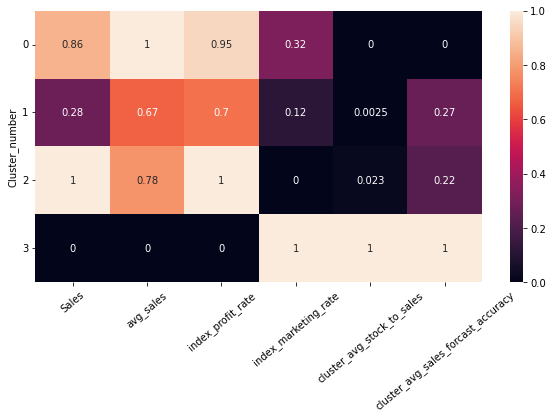

In [73]:
# Plot heatmap to see which feature separate clusters

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.heatmap(df7_scaled, annot=True)
plt.xticks(rotation=40)
plt.yticks(rotation=0)


First of all, Cluster 3 is very differenct from other clusters.  It's very easy to separate it from others. \
\
Secondly, Cluster 1 can be differentiated by the first variable, `Sales`, due to its relatively small sales. \
\
Thirdly, with close `Sales` and `Profit_Rate`, Cluster 0 and Cluster 2 seem to be in the same position.  However, `index_marketing_rate` tells us that Cluster0 had to spend more money on marketing to achieve the similar sales and profit performance compared to Cluster 2. \
</bar>


### 8.2.2 Cluster Summary

In [74]:
# List all names and types of products assigned to each cluster

df8 = pd.merge(df5,product, on='ProductId',how='inner')
df8['Product_Name'] = df8[['Type', 'Product']].agg(' '.join, axis=1)
df_product = df8.groupby('Cluster_number').apply(lambda x: ', '.join(x.Product_Name))

print('Cluster {} has {}.'.format('0',df_product[0]))
print('Cluster {} has {}.'.format('1',df_product[1]))
print('Cluster {} has {}.'.format('2',df_product[2]))
print('Cluster {} has {}.'.format('3',df_product[3]))

Cluster 0 has Regular Columbian, Regular Caffe Mocha, Decaf Lemon.
Cluster 1 has Regular Amaretto, Regular Caffe Latte, Regular Regular Espresso, Decaf Mint.
Cluster 2 has Decaf Decaf Irish Cream, Decaf Decaf Espresso, Decaf Chamomile, Regular Darjeeling, Regular Earl Grey.
Cluster 3 has Regular Green Tea.


#### Cluster 0

Cluster 0 contains Product 2, 5 and 9.  \
Regular Columbian, Regular Caffe Mocha, Decaf Lemon \
This cluster is very robust with large `Sales` and strong profitability. Stores managed budget very well, which means the performance is on track.  The only thing is that this cluster spent more expense on marketing to keep its performance.

#### Cluster 1

Cluster 1 contains Product 1, 4, 7 and 10. \
Regular Amaretto, Regular Caffe Latte, Regular Espresso, Decaf Mint \
This cluster is not as good as cluster 0 and 2. The performance is at a average level except profit rate. This cluster is sruggling with expenses, which can be averaged down when they sell more.   Stores need to find a way to sell more to reduce average cost and increase profit_rate.

#### Cluster 2

Cluster 2 contains Product 3, 6, 8, 11 and 12. \
Decaf Decaf Irish Cream, Decaf Decaf Espresso, Decaf Chamomile, Regular Darjeeling, Regular Earl Grey \
This cluster is the best cluster compared to other three.  It has the largest `Sales`, the highest profit rate and less marketing expense rate.  In other words, products in this cluster spent less but sold really well.

#### Cluster 3

Cluster 3 contains Product 13. \
Regular Green Tea \
This cluster is the worst cluster.  It has the lowest sales number and highest marketing expense rate.  The profit rate is supposed to be an outperformer with so much marketing expense rate; however, its profit is far off.  What makes it even worse, stores thought it would sell well (based on sales_forcast_accuracy), so they might have too much inventory ( based on stock_to_sales ratio).  

# 9. Further Strategies

Now here is strategy time!  With 13 products divided into 4 clusters, it's important to give further business strategies to fulfill the last step of Product Profiling in Cluster Analysis.

For Cluster 0, overall performance is good.  But the marketing expense is not as helpful as expected.  It may need further market test with slight lower marketing expense to reduce the cost.  If `Sales` stays the same, then we don't need to spend as much as before on Marketing.  In this way, we improve the profit rate.

Cluster 1's problem is the total `Sales`.  The average sales is close to other clusters.  But due to low total `Sales`, the cost of these products had not been diluted.  The strategy is to expand markets to sell more.  Increasing marketing expense may help.

Cluster 2 is a strong performer with high sales and high profitability.  These products may need to have some programs to keep existing customers.

Cluster 3 has a red flag.  Apprently, the `Sales` didn't go well as the budget.  Plus, the cost and expense are also hight.  That's why profit rate is so low. Before we cut it,  we may want to try to bundle it with other popular products to save marketing expense and sell more.  And an alternative source may help get a lower price point.  If none of these work, then we have to drop this product.